In [1]:
from SRRS import plotting,metrics,vignette,simulate,scoring

import shapely.geometry

import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy

import importlib

In [116]:
importlib.reload(plotting)

sample = vignette.m1s4_hdf5()
cells = sample.cells()
orig_cell = cells[5]

In [133]:
#copied from https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


def simulate_cell_spots(orig_cell, gene_counts, gene_bias={}):
    cell = copy.copy(orig_cell)
    cell.zslices = ['0']
    cell.boundaries = {'0':cell.boundaries['0']}
    cell.spot_ranks = {'0':[]}
    cell.gene_counts = collections.Counter(gene_counts)
    cell.gene_vars = {}
    cell.genes = list(gene_counts.keys())
    cell.spot_ranks = {'0':[]}
    
    poly = shapely.geometry.Polygon(cell.boundaries['0'])
    cx,cy = np.mean(poly.boundary.xy,axis=1) #centroid
    x_min,y_min,x_max,y_max = poly.bounds
    
    added_points = []
    added_genes = []
    
    for gene,n in gene_counts.items():
        gene_radial_center_point = None
        num_added = 0
        while num_added < n:
            #find an RNA spot to add
            rx = np.random.uniform(x_min,x_max)
            ry = np.random.uniform(y_min,y_max)
            p = shapely.geometry.Point(rx,ry)

            #possible to be inside bounding box, outside cell
            if not poly.contains(p):
                continue

            #possible to be outside of the gene_radial_center
            if not gene_radial_center_point:
                gene_radial_center_point = [rx,ry]
                
            if gene in gene_bias:
                rcx,rcy = gene_radial_center_point
                d_theta = angle_between([rcx-cx,rcy-cy],[rx-cx,ry-cy])
                if d_theta > gene_bias[gene]:
                    continue
            
            #add the spot
            num_added += 1
            added_points.append((rx,ry))
            added_genes.append(gene)
            
        
            
    cell.spot_coords = {'0':np.array(added_points)}
    cell.spot_genes = {'0':added_genes}
    
    n = sum(gene_counts.values())
    cell.n = n
    cell.n_per_z = {'0':n}
    
    return cell


#Set all gene counts to be 10, then modify a few
num_genes = 20
min_count = 2 #A gene with one spot will always have a perfect radial score
max_count = 50

counts = np.random.randint(min_count,max_count,size=num_genes)
gene_counts = {'g_{}'.format(i):c for i,c in enumerate(counts)}

gene_bias = {'g_0':np.pi/16,'g_1':np.pi/4,'g_2':np.pi/2}

cell_to_save = simulate_cell_spots(
    orig_cell,
    gene_counts=gene_counts,
    gene_bias=gene_bias,
)
cell_to_save

Cell-100135768499645921485399243103156491707-L23_IT_3

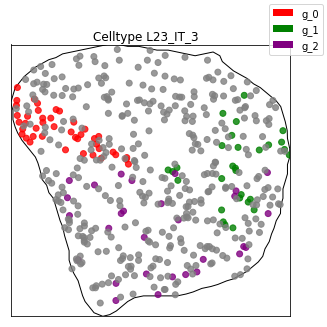

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,median_rank,score,variance
0,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_0,42,40.5,0.832981,0.020360
1,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_1,29,122.0,0.488372,0.030477
18,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_18,7,131.0,0.450317,0.110166
12,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_12,8,173.0,0.272727,0.087944
2,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_2,29,186.0,0.217759,0.030477
19,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_19,14,197.0,0.171247,0.056970
9,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_9,24,244.5,-0.029598,0.035276
4,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_4,4,253.5,-0.067653,0.133048
8,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_8,36,259.0,-0.090909,0.023810
5,radial,100135768499645921485399243103156491707,L23_IT_3,474,g_5,33,272.0,-0.145877,0.026751


In [137]:
fig = plotting.plot_cell_zslices(cell_to_save,gene_colors={'g_0':'red','g_1':'green','g_2':'purple'})
plt.show(fig)
plt.close()
cell_to_save = list(scoring._iter_vars([cell_to_save]))[0]
score_df = list(scoring.iter_scores([cell_to_save],metric='radial'))[0]
score_df = score_df.sort_values('score',ascending=False)
score_df

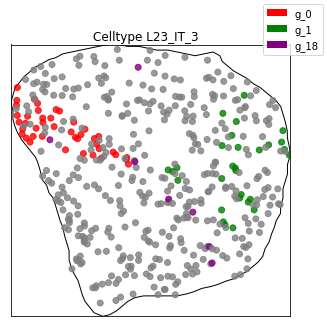

In [135]:
gene_colors = {g:c for g,c in zip(score_df.head(3)['gene'].values,['red','green','purple'])}
fig = plotting.plot_cell_zslices(cell_to_save,gene_colors=gene_colors)

In [84]:
from SRRS import hdf5

In [127]:
importlib.reload(SRRS)

<module 'SRRS' from '/home/rob/SRRS/src/SRRS/__init__.py'>

In [126]:
SRRS.HDF5.write_cells()

In [128]:
    SRRS.HDF5.write_cells([cell_to_save],'testtest.hdf5')

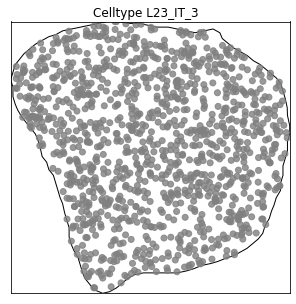

In [129]:
cells = hdf5.HDF5('testtest.hdf5').cells()
cell = cells[0]
fig = plotting.plot_cell_zslices(cell)